In [1]:
! pip install kaggle

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download puneet6060/intel-image-classification

 94% 325M/346M [00:01<00:00, 228MB/s]
100% 346M/346M [00:01<00:00, 224MB/s]


In [6]:
!unzip /content/intel-image-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jp

In [7]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses, Model

In [8]:
train_path="/content/seg_train/seg_train"

In [9]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_path,
  label_mode='int',
  labels = "inferred", validation_split=0.2,
    subset="training",
  shuffle=True,
  seed=123,
  image_size=(150, 150),
  batch_size=32)

Found 14034 files belonging to 6 classes.
Using 11228 files for training.


In [10]:
val_ds = keras.utils.image_dataset_from_directory(
  train_path,
  label_mode='int',
  labels = "inferred", validation_split=0.2,
    subset="validation",
  shuffle=True,
  seed=123,
  image_size=(150, 150),
  batch_size=32)

Found 14034 files belonging to 6 classes.
Using 2806 files for validation.


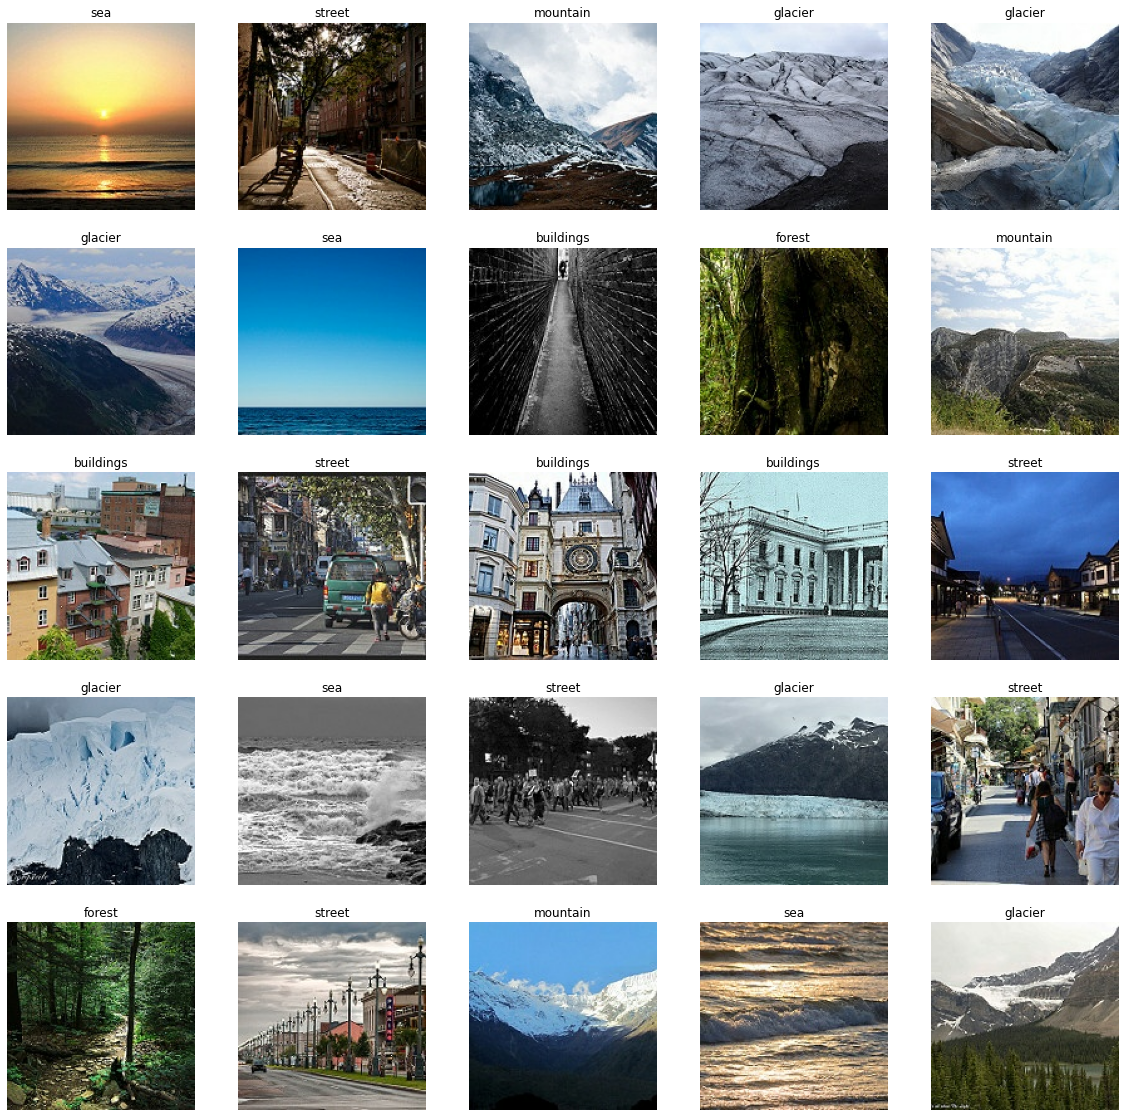

In [11]:
class_names = train_ds.class_names
plt.figure(figsize=(20, 20))
for images, labels in train_ds.take(1):
  for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    #print()
    #idx=list(labels[i].numpy()).index(1)
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [12]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [13]:
base_model = tf.keras.applications.EfficientNetB5(weights = 'imagenet', include_top = False, input_shape = (150,150,3))

115277824/115263384 [==============================] - 1s 0us/step


In [14]:
for layer in base_model.layers:
  layer.trainable = False

In [15]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(1000, activation='relu')(x)
predictions = layers.Dense(6, activation = 'softmax')(x)

In [16]:
head_model = Model(inputs = base_model.input, outputs = predictions)

In [17]:
head_model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [18]:
history = head_model.fit( train_ds, validation_data=val_ds, batch_size=32, epochs=5)

Epoch 1/5
351/351 [==============================] - 157s 368ms/step - loss: 1.2919 - accuracy: 0.8512 - val_loss: 0.2549 - val_accuracy: 0.9109
Epoch 2/5
351/351 [==============================] - 120s 342ms/step - loss: 0.2134 - accuracy: 0.9230 - val_loss: 0.2515 - val_accuracy: 0.9095
Epoch 3/5
351/351 [==============================] - 120s 343ms/step - loss: 0.1722 - accuracy: 0.9358 - val_loss: 0.2597 - val_accuracy: 0.9130
Epoch 4/5
351/351 [==============================] - 120s 343ms/step - loss: 0.1511 - accuracy: 0.9426 - val_loss: 0.2677 - val_accuracy: 0.9141
Epoch 5/5
351/351 [==============================] - 120s 342ms/step - loss: 0.1513 - accuracy: 0.9457 - val_loss: 0.2947 - val_accuracy: 0.9070


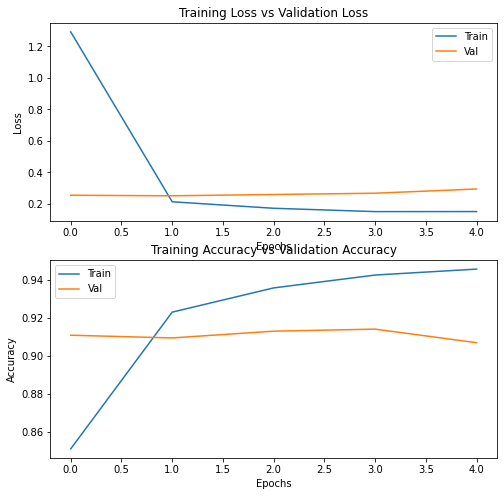

In [19]:
fig, axs = plt.subplots(2, 1, figsize=(8,8))
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train','Val'])
axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Val'])